In [11]:
import matplotlib.pyplot as plt
from pylab import *
from scipy.ndimage import measurements

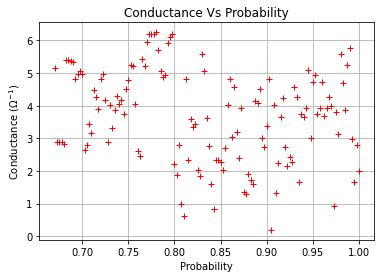

In [14]:
resistances = [0.502, 0.357, 0.602, 0.337, 0.173, 0.191, 0.258, 0.213, 0.179, 0.318, 0.263, 1.093, 0.251, 0.234, 0.255, 0.272, 0.211, 0.255, 0.267, 0.203, 0.211, 0.332, 0.196, 0.255, 0.274, 0.266, 0.599, 0.235, 0.219, 0.437, 0.414, 0.465, 0.366, 0.236, 0.274, 0.447, 0.747, 0.248, 5.204, 0.208, 0.295, 0.365, 0.334, 0.221, 0.245, 0.241, 0.625, 0.581, 0.521, 0.769, 0.746, 0.255, 0.416, 0.314, 0.218, 0.329, 0.208, 0.249, 0.372, 0.492, 0.437, 0.431, 0.431, 1.189, 0.631, 0.363, 0.277, 0.197, 0.179, 0.541, 0.492, 0.291, 0.298, 0.278, 0.431, 0.207, 1.608, 1.028, 0.356, 0.537, 0.451, 0.161, 0.164, 0.169, 0.202, 0.205, 0.197, 0.175, 0.16, 0.161, 0.161, 0.161, 0.168, 0.192, 0.184, 0.408, 0.382, 0.247, 0.192, 0.191, 0.209, 0.221, 0.266, 0.239, 0.247, 0.232, 0.258, 0.301, 0.248, 0.347, 0.239, 0.201, 0.207, 0.256, 0.234, 0.223, 0.317, 0.292, 0.358, 0.377, 0.201, 0.198, 0.201, 0.208, 0.187, 0.186, 0.185, 0.185, 0.353, 0.346, 0.347, 0.347, 0.194]
probabilities = [1.0 - i/400 for i in range(len(resistances))]
conductances = [1/r for r in resistances]

plt.plot(probabilities, conductances, 'r+')
plt.xlabel('Probability')
plt.ylabel('Conductance ($\Omega^{-1}$)')
plt.title('Conductance Vs Probability')
plt.grid()
plt.show()


L=20, p_c=0.5899
L=40, p_c=0.5930
L=60, p_c=0.5930
L=80, p_c=0.5930
L=100, p_c=0.5915


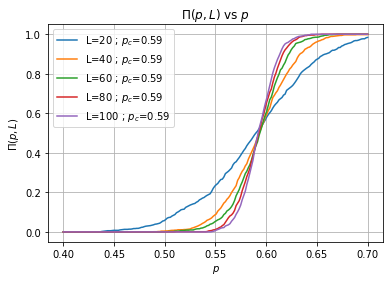

In [13]:
p = np.linspace(0.4, 0.7, 200)
L_values = [20, 40, 60, 80, 100]
N = 1000
Pi = np.zeros((len(p), len(L_values)))

for i, L in enumerate(L_values):
    Ni = np.zeros(len(p))
    
    for j in range(N):
        z = np.random.rand(L, L)
        
        for k, pi in enumerate(p):
            m = z < pi
            lw, num = measurements.label(m)
            
            perc_x = np.intersect1d(lw[0, :], lw[-1, :])
            perc = perc_x[np.where(perc_x > 0)]
            
            if len(perc) > 0:
                Ni[k] += 1
                
        Pi[:, i] = Ni / (j + 1)
    
    pc_index = np.argmin(np.abs(Pi[:, i] - 0.5))
    pc = p[pc_index]
    print(f"L={L}, p_c={pc:.4f}")
    plt.plot(p, Pi[:, i], label=f"L={L} ; $p_c$={pc:.2f}")
    
plt.legend()
plt.xlabel("$p$")
plt.ylabel("$\Pi(p,L)$")
plt.title("$\Pi(p,L)$ vs $p$")
plt.grid()
plt.show()


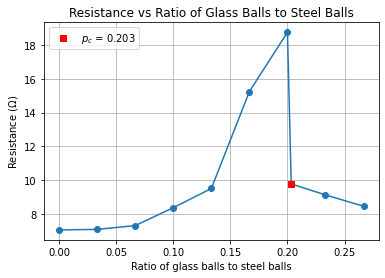

In [25]:
steel_balls = [300, 290, 280, 270, 260, 250, 240, 239, 230, 220]
glass_balls = [0, 10, 20, 30, 40, 50, 60, 61, 70, 80]
lengths = [170, 169.5, 169, 168.5, 168, 167.5, 167, 166.95, 166.5, 166]
resistances = [7.038, 7.069, 7.295, 8.357, 9.498, 15.248, 18.769, 9.765, 9.115, 8.444]

ratio = [glass_balls[i]/(steel_balls[i]+glass_balls[i]) for i in range(len(steel_balls))]

plt.plot(ratio, resistances, 'o-')
plt.xlabel('Ratio of glass balls to steel balls')
plt.ylabel('Resistance ($\Omega$)')

for i in range(len(resistances)-1):
    if resistances[i+1] < resistances[i]:
        plt.plot(ratio[i+1], resistances[i+1], 'rs', label=f'$p_c$ = {ratio[i+1]:.3f}')
        break

plt.title("Resistance vs Ratio of Glass Balls to Steel Balls")
plt.grid()
plt.legend()
plt.show()


In [24]:
print(f"Critical point, p_c: {ratio[i+1]:.3f}")

Critical point, p_c: 0.203
